<a href="https://colab.research.google.com/github/Khyatimunjal/Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [3]:
from pycaret.utils import version
version()

'3.2.0'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [5]:
data = pd.read_csv('iris.csv')

In [6]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# **Using K-Mean Clustering**

In [7]:
!pip install fastapi python-multipart uvicorn
!pip install --upgrade scipy~=1.10.1

**No Data Preprocessing**

In [8]:
from pycaret.clustering import *

kMeanClusteringParameters = setup(data, verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5763,504.9189,0.6772,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,5.1,3.5,1.4,0.2,Iris-setosa,Cluster
0,4.9,3.0,1.4,0.2,Iris-setosa,Cluster 0
1,4.7,3.2,1.3,0.2,Iris-setosa,Cluster 0
2,4.6,3.1,1.5,0.2,Iris-setosa,Cluster 0
3,5.0,3.6,1.4,0.2,Iris-setosa,Cluster 0
4,5.4,3.9,1.7,0.4,Iris-setosa,Cluster 0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,Cluster 1
145,6.3,2.5,5.0,1.9,Iris-virginica,Cluster 1
146,6.5,3.0,5.2,2.0,Iris-virginica,Cluster 1
147,6.2,3.4,5.4,2.3,Iris-virginica,Cluster 1


In [9]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

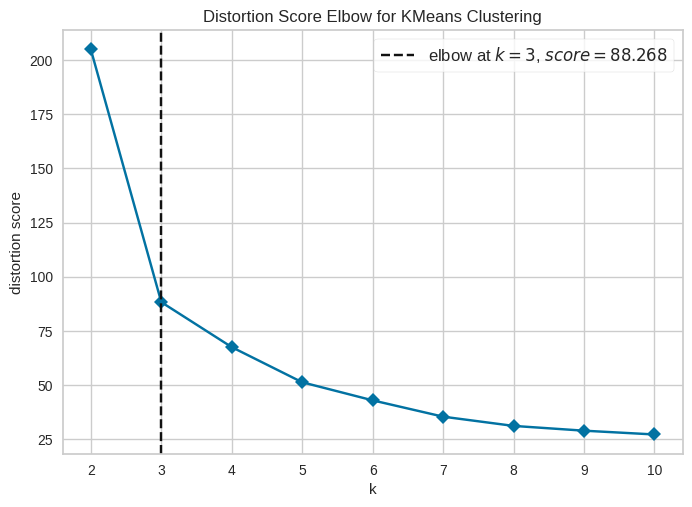

In [10]:
plot_model(KMeanClusteringModel, plot = 'elbow')

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Iris-setosa']=lb.fit_transform(data['Iris-setosa'])

In [12]:
from pycaret.clustering import *

setup(data, verbose=False)
x1 = []
x2 = []
x3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels = x.fit_predict(data)
x1.append(silhouette_score(data,labels))
x1.append(calinski_harabasz_score(data,labels))
x1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels = x.fit_predict(data)
x2.append(silhouette_score(data,labels))
x2.append(calinski_harabasz_score(data,labels))
x2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
x3.append(silhouette_score(data,labels))
x3.append(calinski_harabasz_score(data,labels))
x3.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5795,573.0148,0.6459,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5360,509.8616,0.7164,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5128,516.0598,0.7656,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4416,216.4586,0.8582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

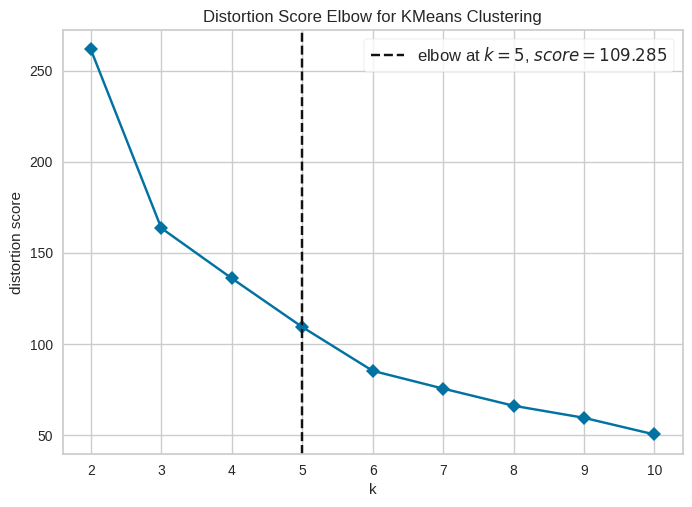

In [13]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [14]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x4 = []
x5 = []
x6 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
x4.append(silhouette_score(data,labels))
x4.append(calinski_harabasz_score(data,labels))
x4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
x5.append(silhouette_score(data,labels))
x5.append(calinski_harabasz_score(data,labels))
x5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
x6.append(silhouette_score(data,labels))
x6.append(calinski_harabasz_score(data,labels))
x6.append(davies_bouldin_score(data,labels))


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4738,259.5705,0.8421,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3981,215.1564,0.8725,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3766,209.4402,0.8907,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4770,259.4696,0.8406,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Transformation**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6008,1204.1339,0.6099,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

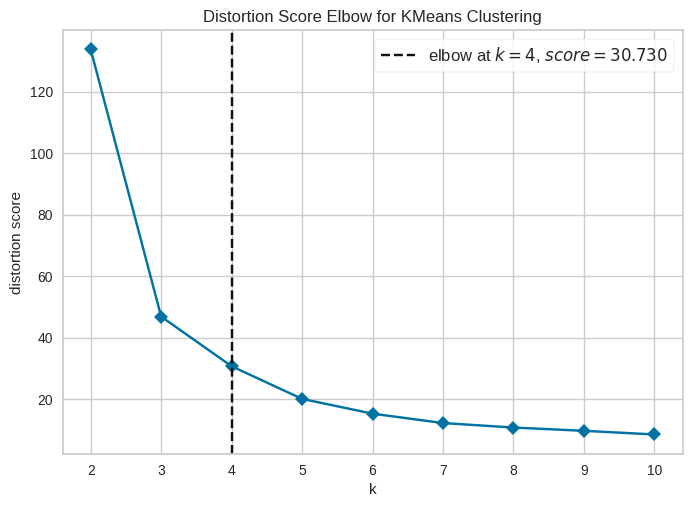

In [16]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [17]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

x7 = []
x8 = []
x9 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
x7.append(silhouette_score(data,labels))
x7.append(calinski_harabasz_score(data,labels))
x7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
x8.append(silhouette_score(data,labels))
x8.append(calinski_harabasz_score(data,labels))
x8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
x9.append(silhouette_score(data,labels))
x9.append(calinski_harabasz_score(data,labels))
x9.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6750,1167.6896,0.4672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6093,1210.1422,0.6002,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5999,1381.3817,0.6022,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [18]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4738,259.5705,0.8421,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5360,509.8616,0.7164,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

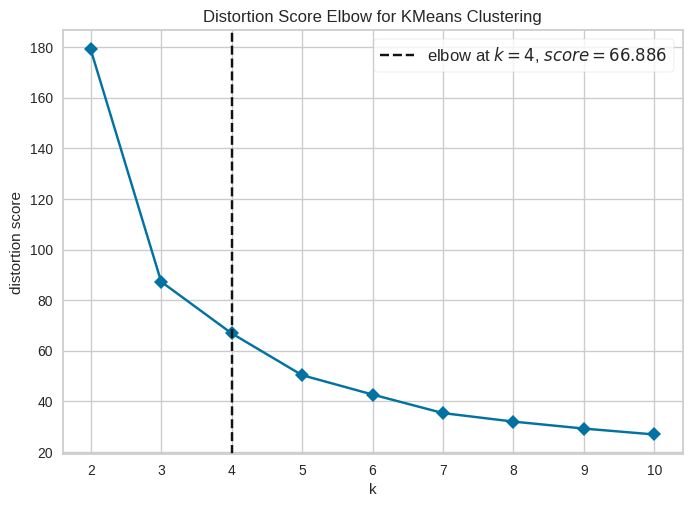

In [19]:
setup(data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [20]:
setup(data, pca = True, pca_method = 'linear', verbose=False)
x10 = []
x11 = []
x12 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
x10.append(silhouette_score(data,labels))
x10.append(calinski_harabasz_score(data,labels))
x10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
x11.append(silhouette_score(data,labels))
x11.append(calinski_harabasz_score(data,labels))
x11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
x12.append(silhouette_score(data,labels))
x12.append(calinski_harabasz_score(data,labels))
x12.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5795,573.0148,0.6459,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5360,509.8616,0.7164,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5162,516.3207,0.7594,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4738,259.5705,0.8421,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization + Transformation**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4465,230.8198,0.8445,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

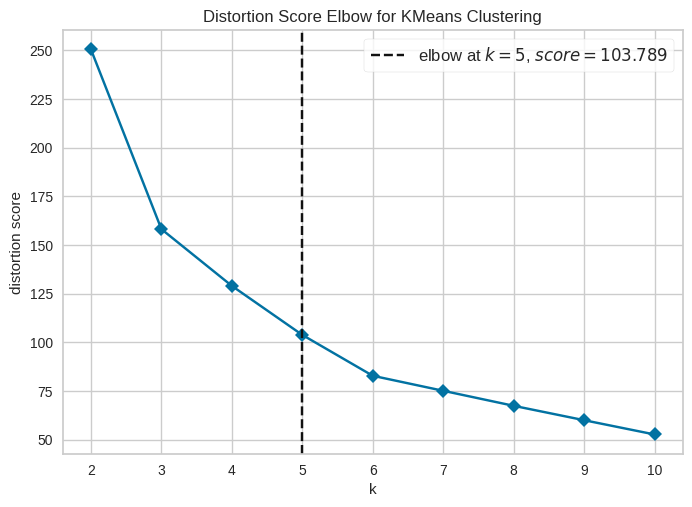

In [22]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [23]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x13 = []
x14 = []
x15 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
x13.append(silhouette_score(data,labels))
x13.append(calinski_harabasz_score(data,labels))
x13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
x14.append(silhouette_score(data,labels))
x14.append(calinski_harabasz_score(data,labels))
x14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
x15.append(silhouette_score(data,labels))
x15.append(calinski_harabasz_score(data,labels))
x15.append(davies_bouldin_score(data,labels))


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4668,270.8918,0.8554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4465,230.8198,0.8445,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3787,222.8008,0.8885,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4668,270.8917,0.8554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Transformation + Normlization + PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4465,230.8197,0.8445,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

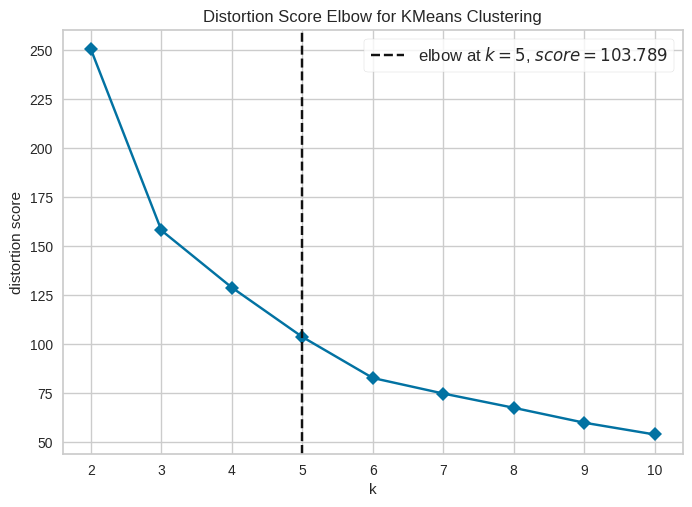

In [25]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [26]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x16 = []
x17 = []
x18 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
x16.append(silhouette_score(data,labels))
x16.append(calinski_harabasz_score(data,labels))
x16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
x17.append(silhouette_score(data,labels))
x17.append(calinski_harabasz_score(data,labels))
x17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
x18.append(silhouette_score(data,labels))
x18.append(calinski_harabasz_score(data,labels))
x18.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4668,270.8917,0.8554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4315,230.6602,0.9422,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3749,222.4081,0.8938,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [27]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4668,270.8917,0.8554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
result1 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': x1,'No Data Processing(c=4)': x2,'No Data Processing(c=5)': x3,
           'Using Normalization(c=3)' : x4,'Using Normalization(c=4)' : x5,'Using Normalization(c=5)' : x6,
           'Using Transform(c=3)' : x7,'Using Transform(c=4)' : x8,'Using Transform(c=5)' : x9,
           'Using PCA(c=3)' : x10,'Using PCA(c=4)' : x11,'Using PCA(c=5)' : x12,
           'Using T + N(c=3)': x13,'Using T + N(c=4)': x14,'Using T + N(c=5)': x15,
           'T + N + PCA(c=3)': x16,'T + N + PCA(c=4)': x17,'T + N + PCA(c=5)': x18}

In [29]:
result1df = pd.DataFrame(result1)

# **Using Hierarchial Clustering**

**No Data Preprocessing**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5473,502.8345,0.6876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

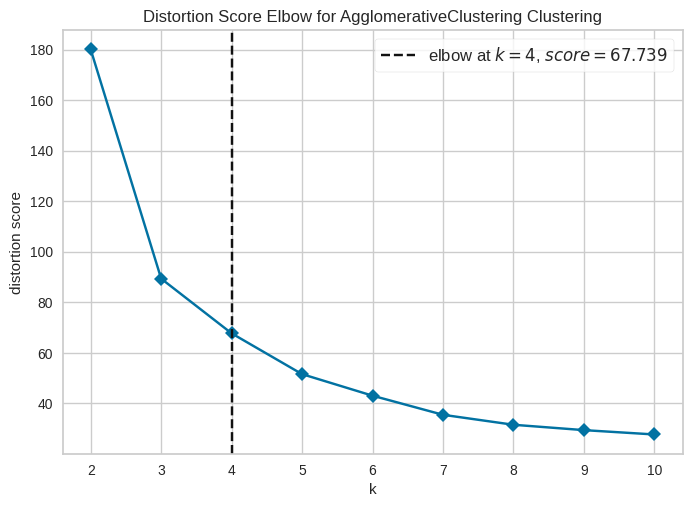

In [30]:
from pycaret.clustering import *

setup(data, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [31]:
hierarchicalModel = create_model('hclust', num_clusters=3)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5758,558.0018,0.6533,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,5.1,3.5,1.4,0.2,Iris-setosa,Cluster
0,4.9,3.0,1.4,0.2,0,Cluster 1
1,4.7,3.2,1.3,0.2,0,Cluster 1
2,4.6,3.1,1.5,0.2,0,Cluster 1
3,5.0,3.6,1.4,0.2,0,Cluster 1
4,5.4,3.9,1.7,0.4,0,Cluster 1
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2,Cluster 0
145,6.3,2.5,5.0,1.9,2,Cluster 0
146,6.5,3.0,5.2,2.0,2,Cluster 0
147,6.2,3.4,5.4,2.3,2,Cluster 0


In [32]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
from pycaret.clustering import *

setup(data, verbose=False)
dbscanModel = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4870,222.0878,2.3403,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
dbscanModelPrediction = assign_model(dbscanModel)
dbscanModelPrediction

,5.1,3.5,1.4,0.2,Iris-setosa,Cluster
0,4.9,3.0,1.4,0.2,0,Cluster 0
1,4.7,3.2,1.3,0.2,0,Cluster 0
2,4.6,3.1,1.5,0.2,0,Cluster 0
3,5.0,3.6,1.4,0.2,0,Cluster 0
4,5.4,3.9,1.7,0.4,0,Cluster 0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2,Cluster 2
145,6.3,2.5,5.0,1.9,2,Cluster 2
146,6.5,3.0,5.2,2.0,2,Cluster 2
147,6.2,3.4,5.4,2.3,2,Cluster 2


In [35]:
from pycaret.clustering import *

setup(data, verbose=False)

x1 = []
x2 = []
x3 = []
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
x1.append(silhouette_score(data,labels))
x1.append(calinski_harabasz_score(data,labels))
x1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
x2.append(silhouette_score(data,labels))
x2.append(calinski_harabasz_score(data,labels))
x2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
x3.append(silhouette_score(data,labels))
x3.append(calinski_harabasz_score(data,labels))
x3.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5758,558.0018,0.6533,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5473,502.8345,0.6876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5151,502.8740,0.7379,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4328,207.3702,0.8599,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

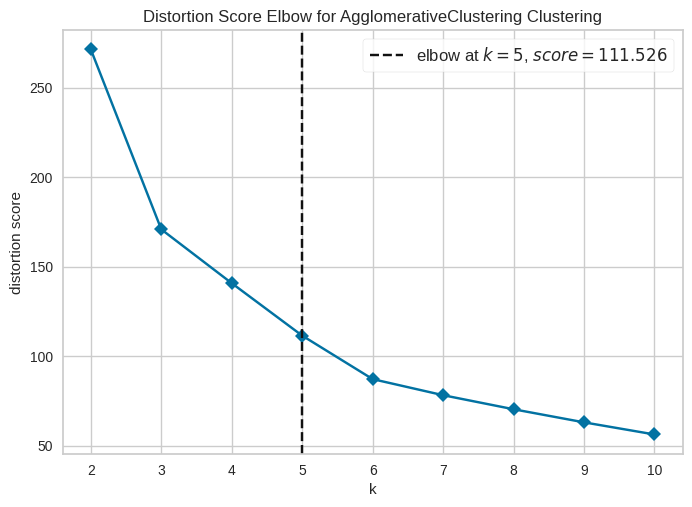

In [36]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [37]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)

x4 = []
x5 = []
x6 = []

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
x4.append(silhouette_score(data,labels))
x4.append(calinski_harabasz_score(data,labels))
x4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
x5.append(silhouette_score(data,labels))
x5.append(calinski_harabasz_score(data,labels))
x5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
x6.append(silhouette_score(data,labels))
x6.append(calinski_harabasz_score(data,labels))
x6.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4796,245.2550,0.8558,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4328,207.3702,0.8599,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4462,204.4811,0.8713,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [38]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4796,245.2550,0.8558,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Transformation**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6026,1128.7313,0.5695,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

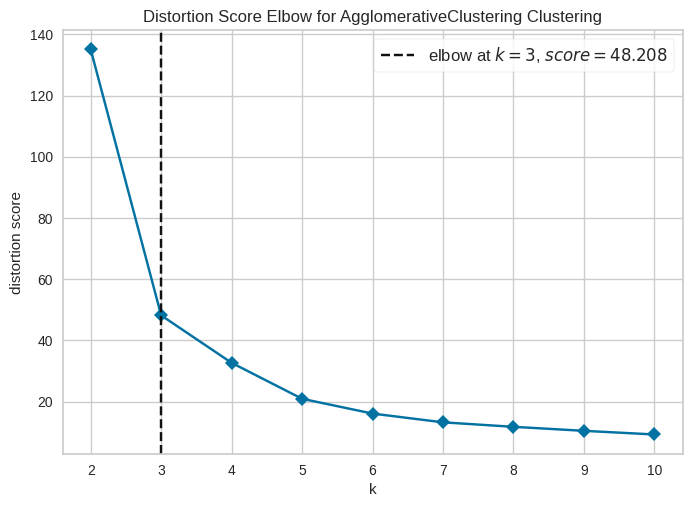

In [39]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [40]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

x7 = []
x8 = []
x9 = []

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
x7.append(silhouette_score(data,labels))
x7.append(calinski_harabasz_score(data,labels))
x7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
x8.append(silhouette_score(data,labels))
x8.append(calinski_harabasz_score(data,labels))
x8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
x9.append(silhouette_score(data,labels))
x9.append(calinski_harabasz_score(data,labels))
x9.append(davies_bouldin_score(data,labels))


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6719,1132.8338,0.4751,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6026,1128.7313,0.5695,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6011,1331.8944,0.5892,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [41]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6719,1132.8338,0.4751,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5473,502.8345,0.6876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

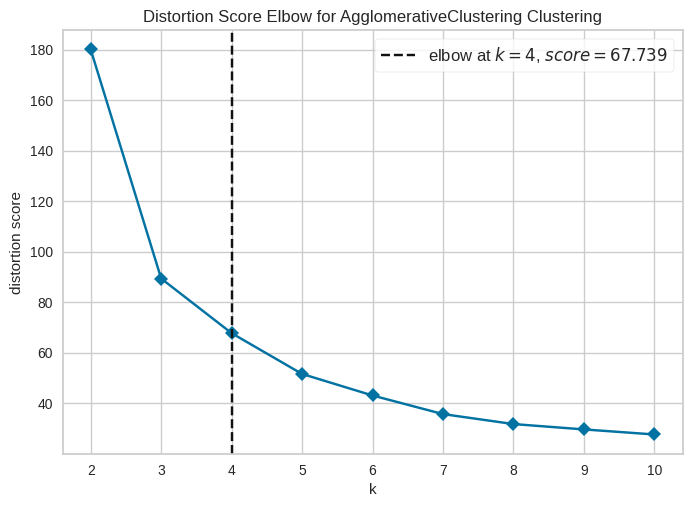

In [42]:
setup(data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [43]:
setup(data, pca = True, pca_method = 'linear', verbose=False)

x10 = []
x11 = []
x12 = []

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
x10.append(silhouette_score(data,labels))
x10.append(calinski_harabasz_score(data,labels))
x10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
x11.append(silhouette_score(data,labels))
x11.append(calinski_harabasz_score(data,labels))
x11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
x12.append(silhouette_score(data,labels))
x12.append(calinski_harabasz_score(data,labels))
x12.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5758,558.0018,0.6533,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5473,502.8345,0.6876,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5151,502.8740,0.7379,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
setup(data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5758,558.0018,0.6533,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization + Transformation**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4395,221.8407,0.8687,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

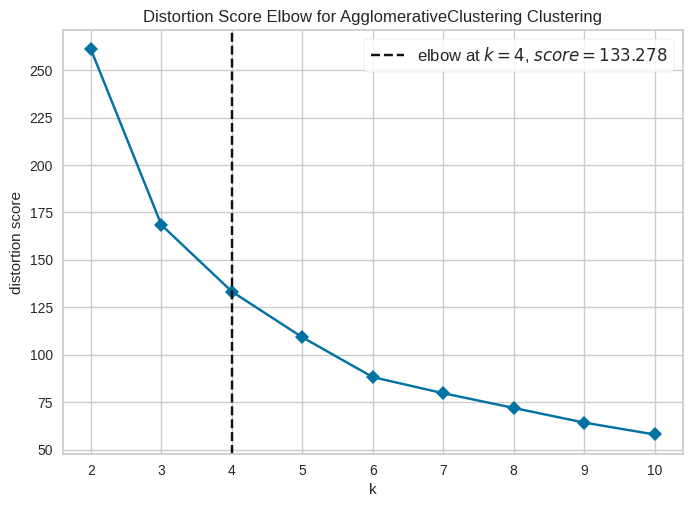

In [45]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [46]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

x13 = []
x14 = []
x15 = []

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
x13.append(silhouette_score(data,labels))
x13.append(calinski_harabasz_score(data,labels))
x13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
x14.append(silhouette_score(data,labels))
x14.append(calinski_harabasz_score(data,labels))
x14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
x15.append(silhouette_score(data,labels))
x15.append(calinski_harabasz_score(data,labels))
x15.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4710,249.9892,0.8810,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4395,221.8407,0.8687,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4429,209.6257,0.8929,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [47]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4710,249.9892,0.8810,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization + Transformation + PCA**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4395,221.8406,0.8687,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

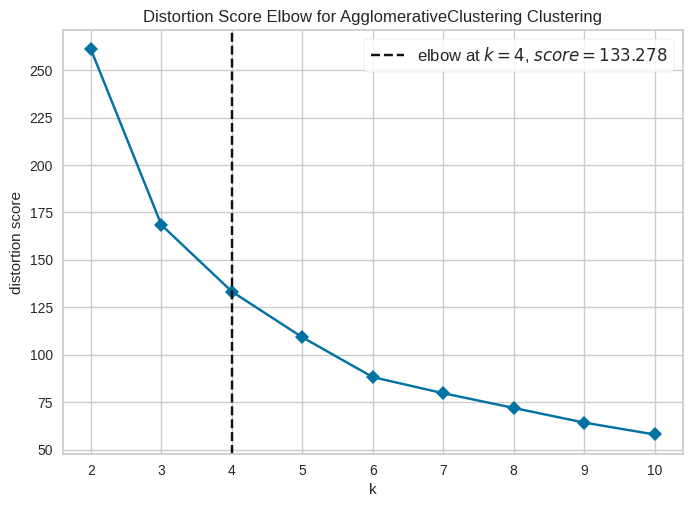

In [48]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [49]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x16 = []
x17 = []
x18 = []

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
x16.append(silhouette_score(data,labels))
x16.append(calinski_harabasz_score(data,labels))
x16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
x17.append(silhouette_score(data,labels))
x17.append(calinski_harabasz_score(data,labels))
x17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
x18.append(silhouette_score(data,labels))
x18.append(calinski_harabasz_score(data,labels))
x18.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4710,249.9891,0.8810,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4395,221.8406,0.8687,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4429,209.6256,0.8929,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [50]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('hclust', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4710,249.9891,0.8810,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [51]:
result2 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': x1,'No Data Processing(c=4)': x2,'No Data Processing(c=5)': x3,
           'Using Normalization(c=3)' : x4,'Using Normalization(c=4)' : x5,'Using Normalization(c=5)' : x6,
           'Using Transform(c=3)' : x7,'Using Transform(c=4)' : x8,'Using Transform(c=5)' : x9,
           'Using PCA(c=3)' : x10,'Using PCA(c=4)' : x11,'Using PCA(c=5)' : x12,
           'Using T + N(c=3)': x13,'Using T + N(c=4)': x14,'Using T + N(c=5)': x15,
           'T + N + PCA(c=3)': x16,'T + N + PCA(c=4)': x17,'T + N + PCA(c=5)': x18}

In [52]:
result2df = pd.DataFrame(result2)

# **Using K-Mean Shift Clustering**

**No Data Preprocessing**

In [53]:
from pycaret.clustering import *

setup(data, verbose=False)

x = create_model('meanshift')
plot_model(x, plot='cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0447,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [54]:
meanshiftModel = create_model('meanshift', num_clusters=3)
meanshiftModelPrediction = assign_model(meanshiftModel)
meanshiftModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0447,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,5.1,3.5,1.4,0.2,Iris-setosa,Cluster
0,4.9,3.0,1.4,0.2,0,Cluster 1
1,4.7,3.2,1.3,0.2,0,Cluster 1
2,4.6,3.1,1.5,0.2,0,Cluster 1
3,5.0,3.6,1.4,0.2,0,Cluster 1
4,5.4,3.9,1.7,0.4,0,Cluster 1
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2,Cluster 0
145,6.3,2.5,5.0,1.9,2,Cluster 0
146,6.5,3.0,5.2,2.0,2,Cluster 0
147,6.2,3.4,5.4,2.3,2,Cluster 0


In [55]:
evaluate_model(meanshiftModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
from pycaret.clustering import *

setup(data, verbose=False)

x19 = []
x20 = []
x21 = []
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)
labels=x.fit_predict(data)
x19.append(silhouette_score(data,labels))
x19.append(calinski_harabasz_score(data,labels))
x19.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)
labels=x.fit_predict(data)
x20.append(silhouette_score(data,labels))
x20.append(calinski_harabasz_score(data,labels))
x20.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)
labels=x.fit_predict(data)
x21.append(silhouette_score(data,labels))
x21.append(calinski_harabasz_score(data,labels))
x21.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0447,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0447,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0447,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization**

In [57]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('meanshift')
plot_model(x, plot = 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5886,271.7256,0.5729,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [58]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)

x22 = []
x23 = []
x24 = []
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)
labels=x.fit_predict(data)
x22.append(silhouette_score(data,labels))
x22.append(calinski_harabasz_score(data,labels))
x22.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)
labels=x.fit_predict(data)
x23.append(silhouette_score(data,labels))
x23.append(calinski_harabasz_score(data,labels))
x23.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)
labels=x.fit_predict(data)
x24.append(silhouette_score(data,labels))
x24.append(calinski_harabasz_score(data,labels))
x24.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5886,271.7256,0.5729,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5886,271.7256,0.5729,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5886,271.7256,0.5729,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
setup(data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('meanshift', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5886,271.7256,0.5729,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Transformation**

In [60]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')
plot_model(x, plot = 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6750,1167.6896,0.4672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [61]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

x25 = []
x26 = []
x27 = []
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)
labels=x.fit_predict(data)
x25.append(silhouette_score(data,labels))
x25.append(calinski_harabasz_score(data,labels))
x25.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)
labels=x.fit_predict(data)
x26.append(silhouette_score(data,labels))
x26.append(calinski_harabasz_score(data,labels))
x26.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)
labels=x.fit_predict(data)
x27.append(silhouette_score(data,labels))
x27.append(calinski_harabasz_score(data,labels))
x27.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6750,1167.6896,0.4672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6750,1167.6896,0.4672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6750,1167.6896,0.4672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [62]:
setup(data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6750,1167.6896,0.4672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**PCA**

In [63]:
setup(data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('meanshift')
plot_model(x, plot = 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0443,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [64]:
setup(data, pca = True, pca_method = 'linear', verbose=False)

x28 = []
x29 = []
x30 = []
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)
labels=x.fit_predict(data)
x28.append(silhouette_score(data,labels))
x28.append(calinski_harabasz_score(data,labels))
x28.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)
labels=x.fit_predict(data)
x29.append(silhouette_score(data,labels))
x29.append(calinski_harabasz_score(data,labels))
x29.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)
labels=x.fit_predict(data)
x30.append(silhouette_score(data,labels))
x30.append(calinski_harabasz_score(data,labels))
x30.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0443,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0443,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0443,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
setup(data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('meanshift', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6781,487.0443,0.4006,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization + Transformation**

In [66]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')
plot_model(x, plot = 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2298,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [67]:
setup(data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

x31 = []
x32 = []
x33 = []
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)
labels=x.fit_predict(data)
x31.append(silhouette_score(data,labels))
x31.append(calinski_harabasz_score(data,labels))
x31.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)
labels=x.fit_predict(data)
x32.append(silhouette_score(data,labels))
x32.append(calinski_harabasz_score(data,labels))
x32.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)
labels=x.fit_predict(data)
x33.append(silhouette_score(data,labels))
x33.append(calinski_harabasz_score(data,labels))
x33.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2298,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2298,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2298,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [68]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2297,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

**Normalization + Transformation + PCA**

In [69]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('meanshift')
plot_model(x, plot = 'cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2297,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [70]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x34 = []
x35 = []
x36 = []
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)
labels=x.fit_predict(data)
x34.append(silhouette_score(data,labels))
x34.append(calinski_harabasz_score(data,labels))
x34.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)
labels=x.fit_predict(data)
x35.append(silhouette_score(data,labels))
x35.append(calinski_harabasz_score(data,labels))
x35.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)
labels=x.fit_predict(data)
x36.append(silhouette_score(data,labels))
x36.append(calinski_harabasz_score(data,labels))
x36.append(davies_bouldin_score(data,labels))

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2297,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2297,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2297,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [71]:
setup(data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('meanshift', num_clusters = 3)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6010,290.2297,0.5547,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [72]:
result3 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': x19,'No Data Processing(c=4)': x20,'No Data Processing(c=5)': x21,
           'Using Normalization(c=3)' : x22,'Using Normalization(c=4)' : x23,'Using Normalization(c=5)' : x24,
           'Using Transform(c=3)' : x25,'Using Transform(c=4)' : x26,'Using Transform(c=5)' : x27,
           'Using PCA(c=3)' : x28,'Using PCA(c=4)' : x29,'Using PCA(c=5)' : x30,
           'Using T + N(c=3)': x31,'Using T + N(c=4)': x32,'Using T + N(c=5)': x33,
           'T + N + PCA(c=3)': x34,'T + N + PCA(c=4)': x35,'T + N + PCA(c=5)': x36}

In [73]:
result3df = pd.DataFrame(result3)

#**Results**

In [74]:
print("Using K-Means Clustering")
result1df

Using K-Means Clustering


,Parameters,No Data Processing(c=3),No Data Processing(c=4),No Data Processing(c=5),Using Normalization(c=3),Using Normalization(c=4),Using Normalization(c=5),Using Transform(c=3),Using Transform(c=4),Using Transform(c=5),Using PCA(c=3),Using PCA(c=4),Using PCA(c=5),Using T + N(c=3),Using T + N(c=4),Using T + N(c=5),T + N + PCA(c=3),T + N + PCA(c=4),T + N + PCA(c=5)
0,Silhouette,0.579497,0.535979,0.512827,0.579497,0.540075,0.522116,0.579497,0.539564,0.520600,0.579497,0.535979,0.516229,0.579497,0.540075,0.522116,0.579497,0.539564,0.514679
1,Calinski-Harabasz,573.014668,509.861542,516.059758,573.014668,509.665086,515.481228,573.014668,509.329487,515.517868,573.014668,509.861542,516.320615,573.014668,509.665086,515.481228,573.014668,509.329487,516.357367
2,Davies-Bouldins,0.645927,0.716448,0.765573,0.645927,0.703498,0.739956,0.645927,0.708950,0.743137,0.645927,0.716448,0.759439,0.645927,0.703498,0.739956,0.645927,0.708950,0.762620


In [75]:
print("Using Hierarchical Clustering")
result2df

Using Hierarchical Clustering


,Parameters,No Data Processing(c=3),No Data Processing(c=4),No Data Processing(c=5),Using Normalization(c=3),Using Normalization(c=4),Using Normalization(c=5),Using Transform(c=3),Using Transform(c=4),Using Transform(c=5),Using PCA(c=3),Using PCA(c=4),Using PCA(c=5),Using T + N(c=3),Using T + N(c=4),Using T + N(c=5),T + N + PCA(c=3),T + N + PCA(c=4),T + N + PCA(c=5)
0,Silhouette,0.575792,0.547267,0.515123,0.575792,0.547267,0.515123,0.575792,0.547267,0.515123,0.575792,0.547267,0.515123,0.575792,0.547267,0.515123,0.575792,0.547267,0.515123
1,Calinski-Harabasz,558.001757,502.834461,502.873909,558.001757,502.834461,502.873909,558.001757,502.834461,502.873909,558.001757,502.834461,502.873909,558.001757,502.834461,502.873909,558.001757,502.834461,502.873909
2,Davies-Bouldins,0.653289,0.687577,0.737949,0.653289,0.687577,0.737949,0.653289,0.687577,0.737949,0.653289,0.687577,0.737949,0.653289,0.687577,0.737949,0.653289,0.687577,0.737949


In [76]:
print("Using K-Means Shift Clustering")
result3df

Using K-Means Shift Clustering


,Parameters,No Data Processing(c=3),No Data Processing(c=4),No Data Processing(c=5),Using Normalization(c=3),Using Normalization(c=4),Using Normalization(c=5),Using Transform(c=3),Using Transform(c=4),Using Transform(c=5),Using PCA(c=3),Using PCA(c=4),Using PCA(c=5),Using T + N(c=3),Using T + N(c=4),Using T + N(c=5),T + N + PCA(c=3),T + N + PCA(c=4),T + N + PCA(c=5)
0,Silhouette,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076,0.678076
1,Calinski-Harabasz,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396,487.044396
2,Davies-Bouldins,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625,0.400625
